$$\textbf{PLN. Examen 1: Minería de texto para Turismo}$$
$$\textit{Y. Sarahi García Gozález}$$

<font size=4.5 color='lightblue'>

$\textit{Librerías}$

In [88]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import re

<font size=4.5 color='lightblue'>

$\textit{Preprocesamiento de los datos}$

In [94]:
#obtenemos los nombres de cada hoja del excel
path="/Users/ely/Documents/Maestria/segundo_semestre/cimat2023-1/lenguaje/Proyecto_1_lenguaje/"
excel = openpyxl.load_workbook(path+"Opiniones.xlsx")
nombres = excel.sheetnames
excel.close()
# Eliminamos los números de los nombres de las hojas
solo_nombres= [re.sub(r'[\d,]+', '', nombre).strip() for nombre in nombres]
solo_nombres

['Basilica Colegiata',
 'Mercado Hidalgo',
 'Casa de Diego Rivera',
 'Universidad de Guanajuato',
 'Alhóndiga',
 'Teatro Juárez',
 'Jardín de la Unión',
 'Callejón del Beso',
 'Monumento Pípila',
 'Museo de las Momias']

In [95]:
dataframes_por_hoja = {}# diccionario para almacenar los DataFrames
for nombre_hoja in nombres: #Iteramos sobre cada hoja del excel
    #creamos un dataframe para cada hoja
    df = pd.read_excel(path+"Opiniones.xlsx",sheet_name= nombre_hoja) 
    # Agregamos el DF al diccionario
    dataframes_por_hoja[nombre_hoja] = df

In [96]:
for nombre_hoja in nombres: #Iteramos sobre cada hoja del excel
    #eliminamos las columnas que no utilizaremos 
    dataframes_por_hoja[nombre_hoja] = dataframes_por_hoja[nombre_hoja].drop(columns=["Dispositivo","Número de aportaciones"])
    # Reemplazamos los valores 'Femenino' y 'Masculino' por 0 y 1, respectivamente
    dataframes_por_hoja[nombre_hoja]['Género'] = dataframes_por_hoja[nombre_hoja]['Género'].replace({'Femenino': 0, 'Masculino': 1})

In [97]:
#Ejemplo de DF final
print("Hoja de ", nombres[2])
dataframes_por_hoja[nombres[2]].head()

Hoja de  Casa de Diego Rivera 698


,Género,Edad,Nacional ó Internacional,Calificación,Escala,Título de la opinión,Opinión,País,Idioma,Fecha
0,0,25.0,Internacional,Muy bueno,4,"""Diego was Talented at Portraiture""","""Interesting small museum. The downstairs is t...",Estados Unidos,Inglés,2016-05-22
1,0,27.0,Internacional,Muy bueno,4,"""Hermoso museo""","""Ubicado en la zona turística la casa donde el...",Argentina,Español,2016-05-21
2,0,25.0,Nacional,Muy bueno,4,"""Visita diver-cultural... :)""","""La exposición de obras de Diego Rivera es muy...",México,Español,2016-05-20
3,1,34.0,Internacional,Excelente,5,"""A great place to pay homage to the great pain...","""Diego Rivera was born in Guanajuato and his f...",Colombia,Inglés,2016-05-19
4,1,60.0,Internacional,Muy bueno,4,"""Deeper insight into the artist plus other hig...","""If you are interested in the man and his hist...",Estados Unidos,Inglés,2016-05-18


In [98]:
dataframes_por_hoja[nombres[2]]["Escala"].unique()

array([4, 5, 3, 1, 2])

<font size=4.5 color='lightblue'>

$\textit{Preprocesamiento del texto}$

<font size=4.5 color='lightblue'>

$\textit{Actividades}$

In [117]:
promedios=[]
for nombre_hoja,solo_nombre in zip(nombres,solo_nombres): #Iteramos sobre cada hoja del excel
    prom=dataframes_por_hoja[nombre_hoja]["Escala"].mean()
    promedios.append((solo_nombre,prom))
    print("\n")
    print("*", solo_nombre)
    print("Promedio: ",prom)
    print("Desviacion estándar: ",dataframes_por_hoja[nombre_hoja]["Escala"].std())




* Basilica Colegiata
Promedio:  4.5
Desviacion estándar:  0.6687504702153396


* Mercado Hidalgo
Promedio:  3.9483333333333333
Desviacion estándar:  0.9507033977392814


* Casa de Diego Rivera
Promedio:  4.243553008595988
Desviacion estándar:  0.8040392901549579


* Universidad de Guanajuato
Promedio:  4.6033333333333335
Desviacion estándar:  0.6126130687218946


* Alhóndiga
Promedio:  4.45483870967742
Desviacion estándar:  0.7457112582889636


* Teatro Juárez
Promedio:  4.702970297029703
Desviacion estándar:  0.5181455546147319


* Jardín de la Unión
Promedio:  4.591710758377425
Desviacion estándar:  0.6073702093154869


* Callejón del Beso
Promedio:  3.9955882352941177
Desviacion estándar:  0.9712472464286253


* Monumento Pípila
Promedio:  4.377777777777778
Desviacion estándar:  0.7679497101096943


* Museo de las Momias
Promedio:  3.6751515151515153
Desviacion estándar:  1.136494565844279


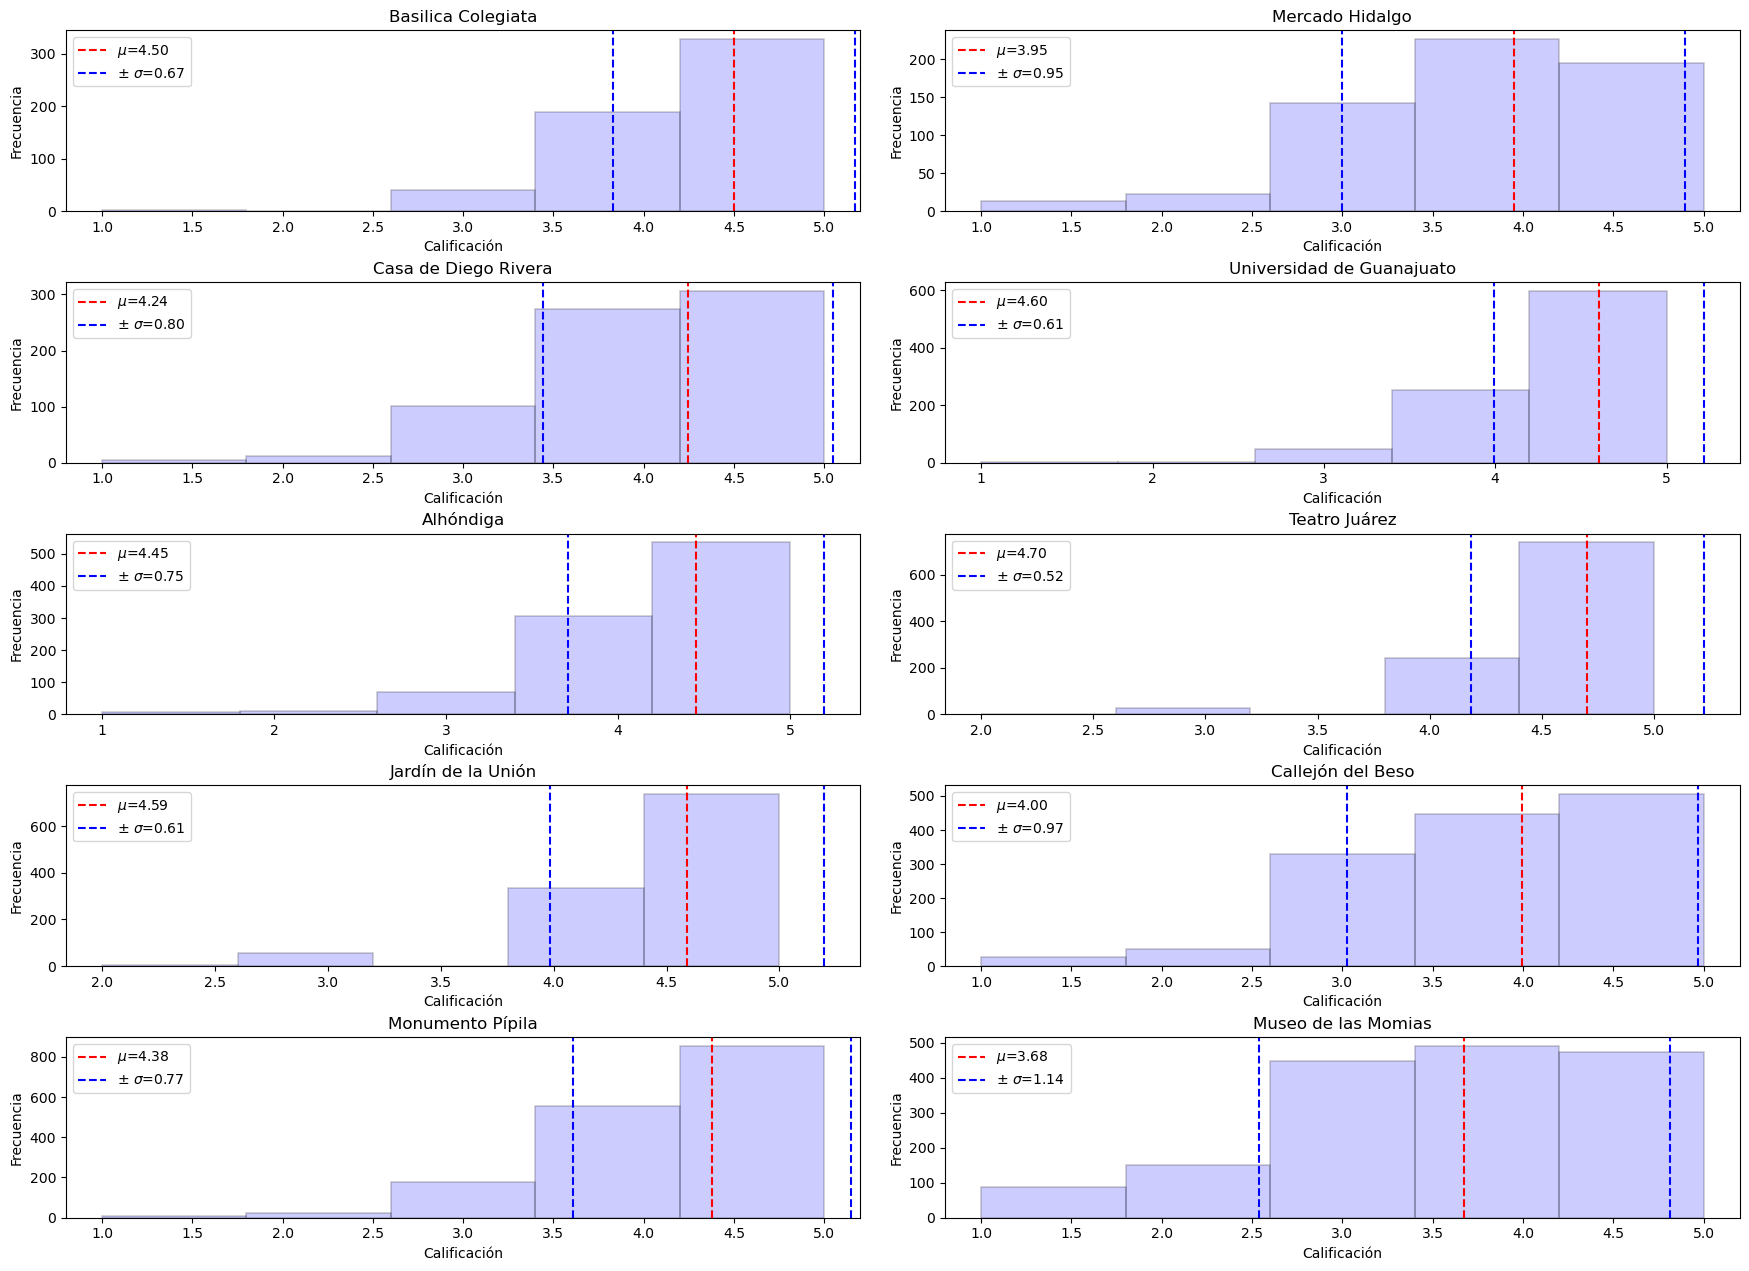

In [116]:
num_subplots = len(nombres)

# Crea una nueva figura para los subgráficos
fig, axs = plt.subplots(5, 2, figsize=(18, 13))

# Ajusta el diseño de los subgráficos
fig.tight_layout(pad=3.0)
i=0
# Itera sobre los nombres de las hojas y crea un subgráfico para cada uno
for nombre_hoja,solo_nombre in zip(nombres,solo_nombres):

    # Selecciona el subgráfico actual
    ax = axs[i//2, i%2] if num_subplots > 1 else axs
    
    # Calcula el promedio y la desviación estándar de la columna 'Escala' para la hoja actual
    promedio = dataframes_por_hoja[nombre_hoja]['Escala'].mean()
    desviacion_estandar = dataframes_por_hoja[nombre_hoja]['Escala'].std()

    # promedio

    ax.axvline(x=promedio, color='r', linestyle='--', label=f'$\mu$={promedio:.2f}')
    #hist
    ax.hist(dataframes_por_hoja[nombre_hoja]['Escala'], bins=5, alpha=0.2, color='b', edgecolor='black', linewidth=1.2)

    #desviación estándar 
    ax.axvline(x=promedio + desviacion_estandar, color='b', linestyle='--', label=f'$\pm$ $\sigma$={desviacion_estandar:.2f}')
    ax.axvline(x=promedio - desviacion_estandar, color='b', linestyle='--')
  
    #título uy ejes
    ax.set_title(f'{solo_nombre}')
    ax.set_xlabel('Calificación')
    ax.set_ylabel('Frecuencia')
    ax.legend()
    i=i+1

# Muestra los subgráficos
plt.show()

In [118]:
promedios = sorted(promedios, key=lambda x: x[1])

[('Basilica Colegiata', 4.5),
 ('Mercado Hidalgo', 3.9483333333333333),
 ('Casa de Diego Rivera', 4.243553008595988),
 ('Universidad de Guanajuato', 4.6033333333333335),
 ('Alhóndiga', 4.45483870967742),
 ('Teatro Juárez', 4.702970297029703),
 ('Jardín de la Unión', 4.591710758377425),
 ('Callejón del Beso', 3.9955882352941177),
 ('Monumento Pípila', 4.377777777777778),
 ('Museo de las Momias', 3.6751515151515153)]